In [1]:
#Implementing Izhikevich neuron model

import numpy as np
import matplotlib.pyplot as plt

# Izhikevich parameters for regular spiking neuron
a, b, c, d = 0.02, 0.2, -65, 8
T = 1000  # ms
dt = 1
n = T // dt
v = -65 * np.ones(n)
u = b * v[0]
I = np.zeros(n)
I[100:900] = 10  # Input current

for t in range(1, n):
    if v[t-1] >= 30:
        v[t-1] = 30
        v[t] = c
        u = u + d
    else:
        dv = 0.04 * v[t-1]**2 + 5 * v[t-1] + 140 - u + I[t]
        du = a * (b * v[t-1] - u)
        v[t] = v[t-1] + dv * dt
        u = u + du * dt



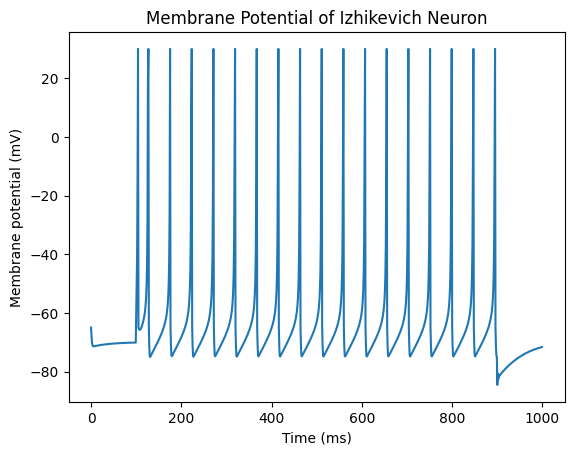

In [2]:
# Plot
plt.plot(np.arange(n), v)
plt.title("Membrane Potential of Izhikevich Neuron")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.show()


In [3]:
#Network based on synaptic model

# Parameters
N = 100                 # Total number of neurons
Ne = int(0.8 * N)       # Number of excitatory neurons
Ni = N - Ne             # Number of inhibitory neurons
T = 1000                # Simulation time (ms)
dt = 1                  # Time step
steps = int(T / dt)


In [4]:
# Izhikevich neuron parameters
a = np.concatenate([0.02 * np.ones(Ne), 0.1 * np.ones(Ni)])
b = np.concatenate([0.2 * np.ones(Ne), 0.2 * np.ones(Ni)])
c = np.concatenate([-65 * np.ones(Ne), -65 * np.ones(Ni)])
d = np.concatenate([8 * np.ones(Ne), 2 * np.ones(Ni)])


In [5]:
# Initialize variables
v = -65 * np.ones(N)  # Membrane potentials
u = b * v             # Recovery variables
firings = []          # Spike timings


In [6]:
# Synaptic weights
W = np.random.randn(N, N)
W[:Ne, :] = np.maximum(0, W[:Ne, :])     # Excitatory connections
W[Ne:, :] = -np.abs(W[Ne:, :])           # Inhibitory connections


In [7]:

# STDP parameters
tau_pre = 20.0
tau_post = 20.0
A_plus = 0.01
A_minus = -0.012
stdp = np.zeros((N, N))

In [8]:

# Record spikes
spike_raster = np.zeros((N, steps))


In [9]:

# Input stimulus
I_base = np.zeros(N)
I_base[:Ne] = 5  # Light stimulus to excitatory neurons

In [10]:
# Simulation loop
for t in range(steps):
    I = I_base + np.random.randn(N) * 2  # Input with noise
    fired = np.where(v >= 30)[0]
    spike_raster[fired, t] = 1
    firings.extend([(t, i) for i in fired])

In [11]:
# Reset neurons
v[fired] = c[fired]
u[fired] += d[fired]


In [12]:
# STDP updates
for i in fired:
        stdp[i, :] += A_plus
        stdp[:, i] += A_minus

# Synaptic input
I += np.sum(W[:, fired], axis=1)

# Update neuron states
dv = (0.04 * v**2 + 5 * v + 140 - u + I) * dt
du = (a * (b * v - u)) * dt
v += dv
u += du

# STDP decay
stdp *= np.exp(-dt / tau_pre)

# Apply STDP rule
dW = stdp * spike_raster[:, t][:, None]
W += dW
W = np.clip(W, -10, 10)